<a href="https://colab.research.google.com/github/phanng0605/stockprediction-ver1/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import requests
plt.style.use('fivethirtyeight')

In [ ]:
session = requests.session()
session.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'

df = web.DataReader('AAPL', data_source='yahoo',start = '2020-01-01', end = '2022-11-17', session = session)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.561546
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,72.846375
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.426834
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.081482
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.257103
...,...,...,...,...,...,...
2022-11-10,146.869995,139.500000,141.240005,146.869995,118854000.0,146.869995
2022-11-11,150.009995,144.369995,145.820007,149.699997,93903800.0,149.699997
2022-11-14,150.279999,147.429993,148.970001,148.279999,73374100.0,148.279999


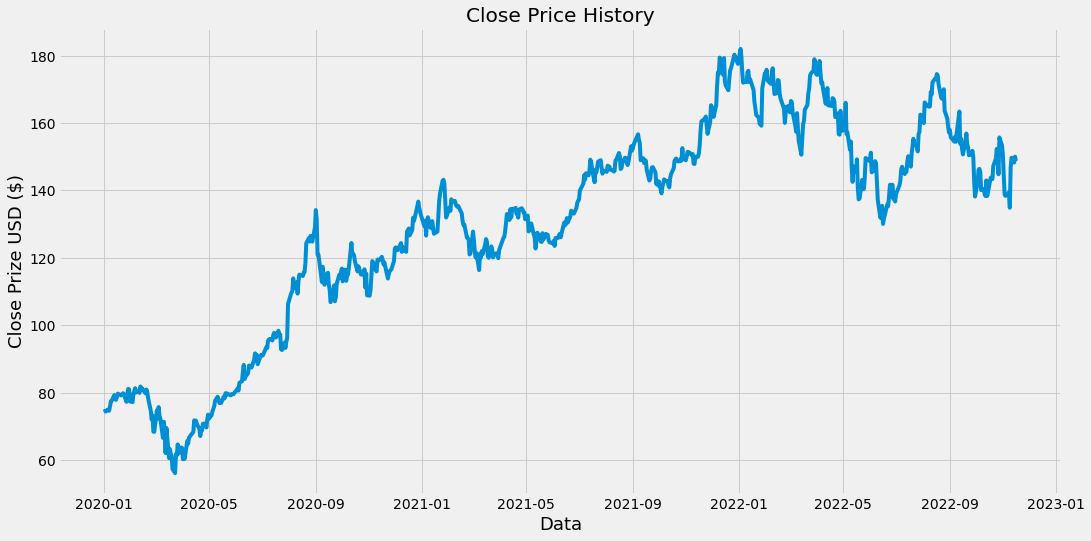

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize = 18)
plt.ylabel('Close Prize USD ($)', fontsize = 18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

581

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.101

In [ ]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.15085277, 0.14505529, 0.14976075, 0.14696135, 0.15649137,
       0.16927753, 0.17066729, 0.18383068, 0.17533306, 0.17267259,
       0.18041574, 0.18734493, 0.1830564 , 0.18529994, 0.18833764,
       0.18651102, 0.16792745, 0.18528007, 0.19848314, 0.19754999,
       0.16903929, 0.16735166, 0.18758317, 0.19274529, 0.20021045,
       0.18992596, 0.19294378, 0.18909205, 0.2041615 , 0.19953542,
       0.19969428, 0.18788097, 0.19705363, 0.190462  , 0.17606765,
       0.14654436, 0.12649154, 0.13556496, 0.09758373, 0.09726605,
       0.14779519, 0.12895351, 0.15559791, 0.13610106, 0.12837772,
       0.08299089, 0.12105149, 0.1013759 , 0.04737229, 0.1064189 ,
       0.03542004, 0.05656483, 0.04427503, 0.04052257, 0.00966905,
       0.        , 0.04469198, 0.0419918 , 0.06764351, 0.04639945])]
[0.06043640374502146]

[array([0.15085277, 0.14505529, 0.14976075, 0.14696135, 0.15649137,
       0.16927753, 0.17066729, 0.18383068, 0.17533306, 0.17267259,
       0.18041574, 0.18734493, 0.18

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape


(521, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

521/521 [==============================] - 17s 26ms/step - loss: 0.0070


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 15ms/step


In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.714905942719558

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


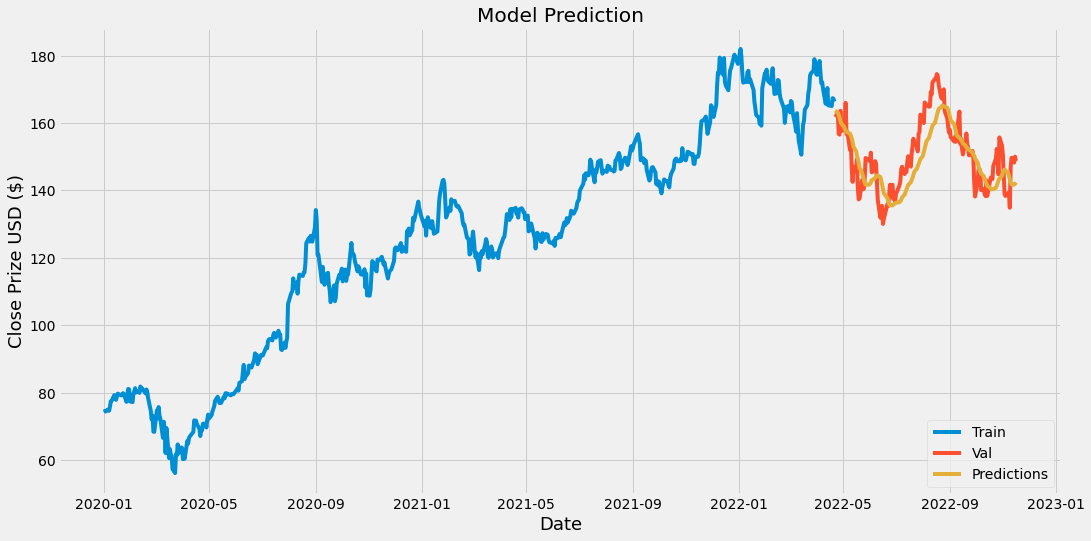

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('')
plt.title('Model Prediction')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Prize USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2022-04-22,161.789993,163.703232
2022-04-25,162.880005,163.076340
2022-04-26,156.800003,162.448288
2022-04-27,156.570007,161.529831
2022-04-28,163.639999,160.494202
...,...,...
2022-11-10,146.869995,142.332703
2022-11-11,149.699997,141.788574
2022-11-14,148.279999,141.751083


In [ ]:
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start ='2012-01-01', end = '2022-11-16', session=session)
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 50ms/step
[[142.9399]]


In [ ]:
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start ='2022-11-17', end = '2022-11-17', session=session)
print(apple_quote2['Close'])

Date
2022-11-16    148.789993
Name: Close, dtype: float64
